# Computational astrophy test site:

co owned by Sara Kok, Maria Georganti and Athul Muralidhar Jan, 2018

This source code is written in Python-3
All values in AU, Solar system units

# Initial imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook 
from time import time
from matplotlib import animation

# Stage-1: Sun-Jupiter one body system (r,$\theta$) | astroids: 0


<IPython.core.display.Javascript object>


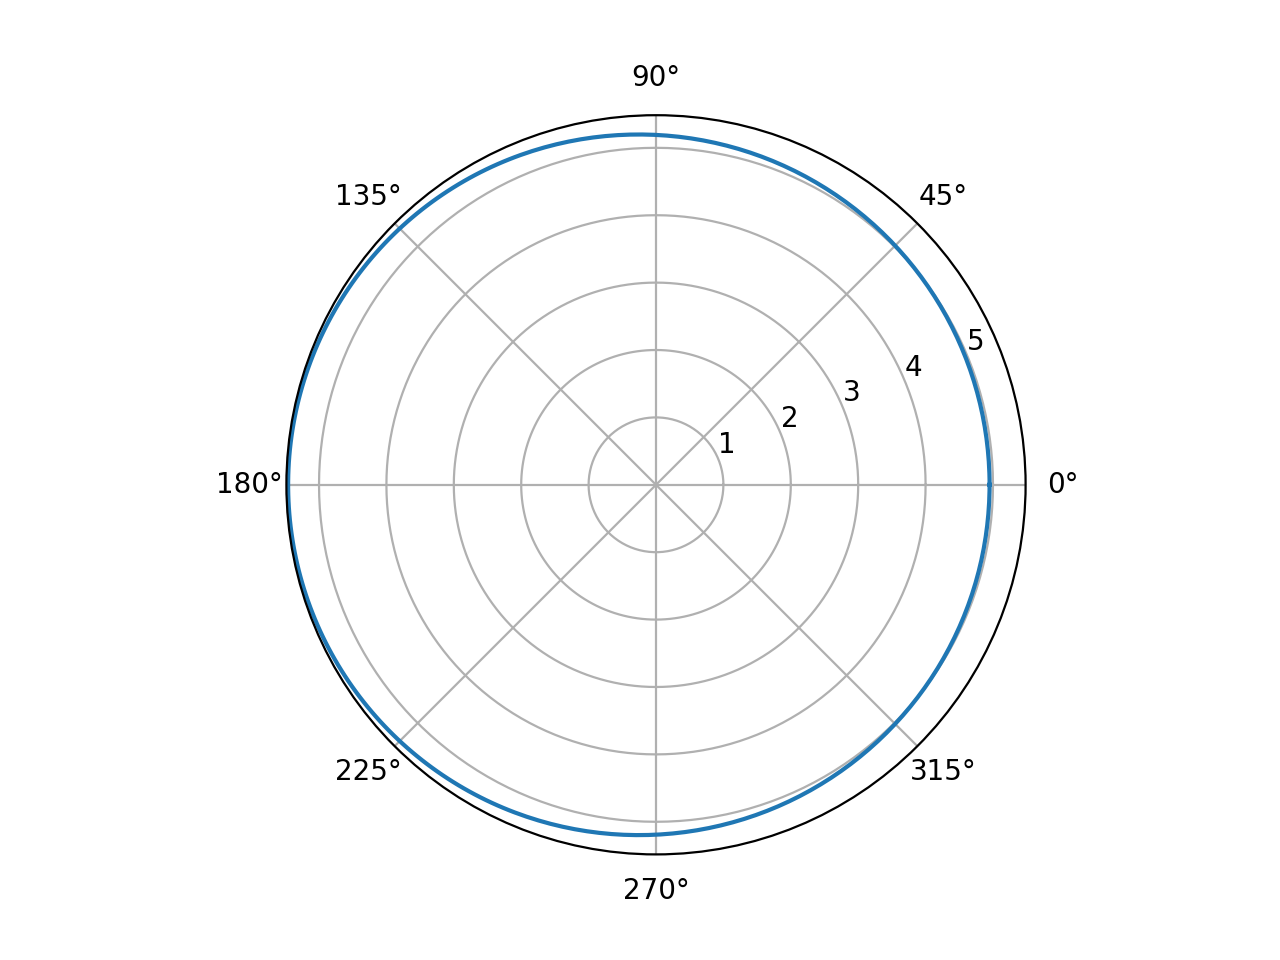

'\nreferences:\nhttps://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html\nhttps://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion\n'

In [5]:

cos = np.cos
pi = np.pi

a = 5.204 # semimajor axis - Jupiter
e = 0.0489 # orbital eccentricity-Jupiter
theta = np.linspace(0, 2*pi, 360) # degrees
r = (a*(1-e**2))/(1+e*cos(theta)) # Kepler's law for orbits
 
plt.polar(theta, r)
plt.show()

"""
references:
https://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html
https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion
"""


<IPython.core.display.Javascript object>


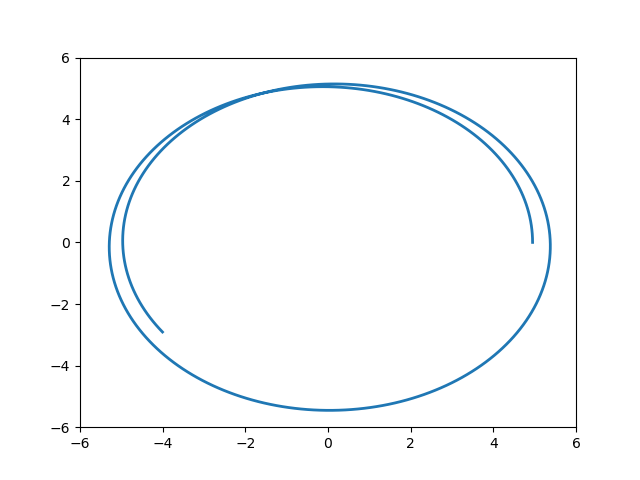

time taken: 0.043360233306884766


In [20]:

s = time()
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!

 ref : https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
"""



cos = np.cos
sin = np.sin
pi = np.pi

a = 5.204 # semimajor axis - Jupiter
e = 0.0489 # orbital eccentricity-Jupiter
theta = np.linspace(0, 2*pi, 360) # degrees
r = (a*(1-e**2))/(1+e*cos(theta)) # Kepler's law for orbits


# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-6, 6), ylim=(-6, 6))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = r*cos(theta*0.1*i)
    y = r*sin(theta*0.1*i)
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

e = time()
print('time taken:',e-s)


# Stage-1.1: Sun, jupiter 1 body system (x,y) | astroids = 0
ref: Selma's ppt week: 3.2 using Euler forward

<IPython.core.display.Javascript object>


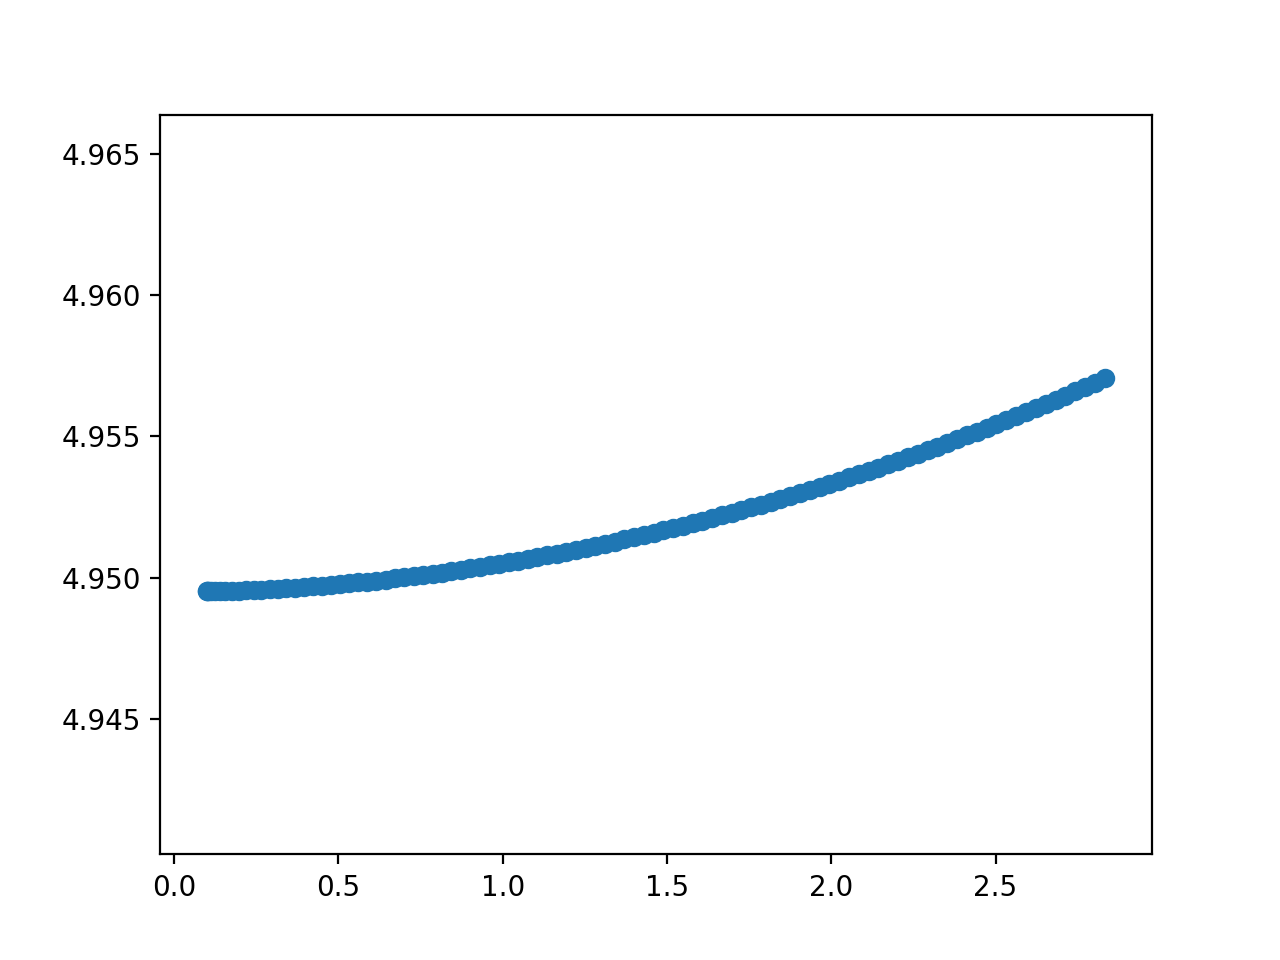

('time taken:', 0.1019899845123291)


In [29]:
s = time()

# initializing
x = list(np.zeros(100))
y = list(np.zeros(100))
u = list(np.zeros(100)) # ref to velocity in y
v = list(np.zeros(100)) # ref to velocity in x
a = 5.204 # semimajor axis - Jupiter
e = 0.0489 # orbital eccentricity-Jupiter

# initial conditions:
x[0] = 0.1
y[0] = a*(1-e)
v[0] = 0.1
u[0] = -((4*np.pi**2*(1+e))/(a*(1-e)))**0.5
h = 0.000001
# print(u)

# solving

for i in range(99):
    x[i+1]  = x[i] + h*v[i]
    v[i+1]  = v[i] + (4*np.pi**2)/(x[i]**2)
    y[i+1]  = y[i] + h*u[i]
    u[i+1]  = u[i] + (4*np.pi**2)/(y[i]**2)
    

# print(x)
# print(y)
# print(v)
# print(u)

plt.scatter(x,y)
plt.show()

e = time()
print("time taken:",e-s)

# Eqns to slove:

$$\dot x _{i+1} = x_{i}+hv_{i}$$
$$\dot{v}_{i+1} = v_{i}-\frac{4\pi^{2}hx_{i}}{\cos(\theta)(x^{2}+y^{2})^{3/2}}$$


$$\dot y _{i+1} = y_{i}+hu_{i}$$
$$\dot{u}_{i+1} = u_{i}-\frac{4\pi^{2}hy_{i}}{\sin(\theta)(x^{2}+y^{2})^{3/2}}$$

In [60]:
a = 5.204
e = 0.0489 
h = 0.005
s = time()

def eul_fwd(h,theta,prev):
    r = (prev[0]**2+prev[2]**2)**3/2
    matrix_x = np.array([[1,h],[-4*np.pi**2*h/r*np.cos(theta),1]])
    matrix_y = np.array([[1,h],[-4*np.pi**2*h/r*np.sin(theta),1]])
    
    xvprev = np.array([prev[0],prev[1]])
    yuprev = np.array([prev[2],prev[3]])
    
    xv = np.dot(matrix_x,xvprev)
    yu = np.dot(matrix_y,yuprev)
#     print(xv)
#     print(np.array([xv,yu]))
    return np.array([xv,yu])



theta = np.linspace(0.1,2*np.pi)
j=1
res_xv = []
res_yu = []

for i in theta:
    if j==1:
        prev = [1,0,5.204*(1-0.0489),-((4*np.pi**2*(1+0.0489))/(5.204*(1-0.0489)))**1/2] #x,v,y,u
    else:
        prev[0] = a[0][0]
        prev[1] = a[0][1]
        prev[2] = a[1][0]
        prev[3] = a[1][1]
    
    a = eul_fwd(h,i,prev)
    res_xv.append([a[0][0],a[0][1]])
    res_yu.append([a[1][0],a[1][1]])
    j=j+1

print(res_yu)
# print(res_xv)
# plt.plot(theta,res[:][0])
e = time()
print('time taken:',e-s)

[[4.9286087983791598, -4.1831320918636692], [4.9076931379198419, -4.1831590652582049], [4.8867773425935512, -4.1832014248004601], [4.8658613354695488, -4.1832591058446305], [4.8449450399403258, -4.1833317894892579], [4.8240283809928792, -4.183418897126816], [4.8031112865072449, -4.1835195889455301], [4.7821936885625176, -4.1836327665729334], [4.761275524729653, -4.1837570799933879], [4.7403567393296857, -4.1838909388100873], [4.7194372846356352, -4.184032527856691], [4.6985171219963515, -4.1841798270955568], [4.6775962228608741, -4.1843306356694674], [4.6566745696825267, -4.1844825999027666], [4.6357521566830124, -4.1846332449769967], [4.6148289904581272, -4.1847800099365298], [4.5939050904084446, -4.1849202856124137], [4.5729804889803827, -4.1850514549888711], [4.5520552317054381, -4.1851709354776547], [4.5311293770280496, -4.1852762225119555], [4.5102029959154901, -4.1853649338247561], [4.4892761712463667, -4.1854348537375037], [4.4683489969776788, -4.1854839767546554], [4.4474215770

In [13]:
xv = np.array([1,2])
yu = np.array([3,4])
a = np.array([xv,yu])
print(a[0][1])


2
